In [7]:
import os
os.chdir('..')

In [8]:
import os, sys
from importlib import reload
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
import ep_finder, lep_finder, graphs

In [3]:
graph = nx.random_geometric_graph(25,.5)

In [4]:
# Reloading cell if needed.
reload(ep_finder)
reload(lep_finder)

<module 'lep_finder' from 'C:\\Users\\josep\\OneDrive\\Documents\\Para la Escuela\\Research\\Network Theory\\EquitablePartitions\\lep_finder.py'>

In [5]:
relabeledGraph = graphs.relabel(graph)
ep_dict, lep_dict, coasestAndLocal = lep_finder.getEquitablePartitions(relabeledGraph,progress_bars=False)

In [29]:
lep_dict

dict_values([{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}])

In [30]:
ep_dict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])

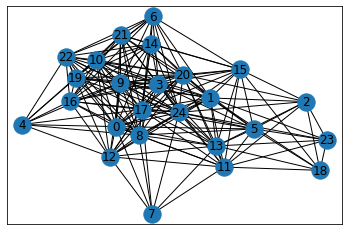

In [8]:
nx.draw_networkx(relabeledGraph)

In [2]:
import matplotlib.backends.backend_pdf as pdfSaver

radii tried: 100%|██████████| 25/25 [00:08<00:00,  2.85it/s]
<ipython-input-12-4979ba33e8a7>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


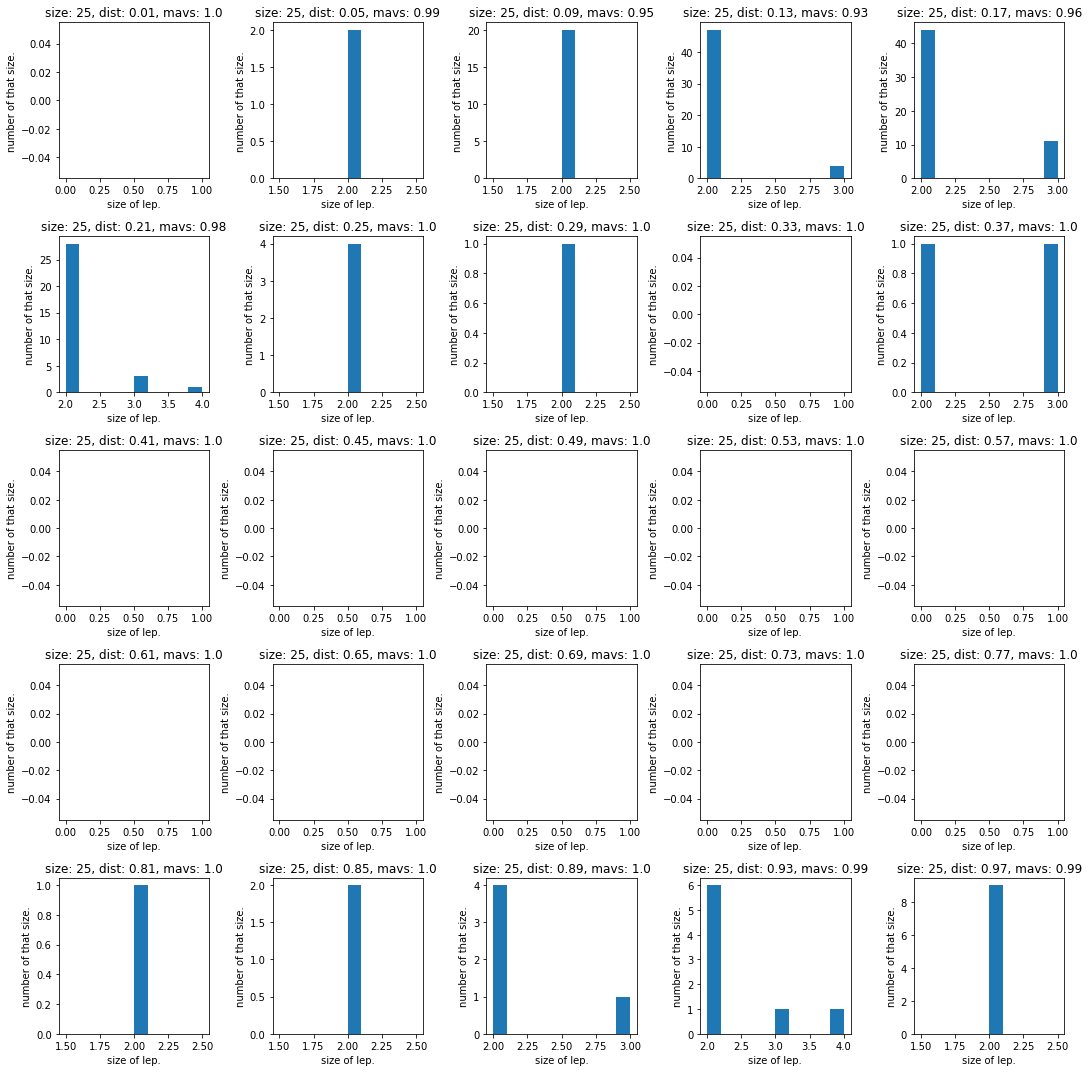

In [12]:
import numpy as np
pdf = pdfSaver.PdfPages("geometric_leps.pdf")
lengths = [rad/100 for rad in range(1,100,4)]
iterations = 100
nNodes_list = [25]
for nNodes in nNodes_list:
    row=-1
    lepSizes = []
    fig,ax = plt.subplots(5,5,figsize=(15,15))

    for index,rad in enumerate(tqdm(lengths,desc="radii tried")):
        lepSizes=[]
        total_leps=0
        mavericks=0
        for i in range(iterations):
            graph=nx.random_geometric_graph(nNodes,rad)
            relabeledGraph = graphs.relabel(graph)
            ep_dict, lep_dict, coasestAndLocal = lep_finder.getEquitablePartitions(relabeledGraph,progress_bars=False)
            for lep in lep_dict:
                total_leps+=1
                if len(lep)==1:
                    mavericks+=1
                else:
                    lepSizes.append(len(lep))
        col = index%5
        if col==0:
            row+=1

        ax[row][col].hist(lepSizes)
        ax[row][col].set_xlabel("size of lep.")
        ax[row][col].set_ylabel("number of that size.")
        ax[row][col].set_title(f"size: {nNodes}, dist: {rad}, mavs: {round(mavericks/total_leps,2)}")
        fig.tight_layout()
    pdf.savefig(fig)
    
    #fig.suptitle(f"Graphs of size: {nNodes}",fontsize=24)
    fig.show()
pdf.close()

In [4]:
pdf = pdfSaver.PdfPages("Geometric_leps.pdf")
pdf.close()